# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.082773e+01     8.580801e+00
 * time: 0.0012249946594238281
     1     2.791173e+01     4.972254e+00
 * time: 0.005247831344604492
     2     2.023873e+01     5.483558e+00
 * time: 0.009886026382446289
     3     1.508126e+01     4.435742e+00
 * time: 0.013799905776977539
     4     1.120649e+01     1.668715e+00
 * time: 0.05709695816040039
     5     1.039477e+01     2.241170e+00
 * time: 0.05961179733276367
     6     9.790097e+00     1.339486e+00
 * time: 0.061944007873535156
     7     9.274476e+00     1.458207e+00
 * time: 0.06428980827331543
     8     8.988473e+00     1.269459e+00
 * time: 0.06671690940856934
     9     8.795059e+00     1.289480e+00
 * time: 0.06914997100830078
    10     8.614257e+00     8.702716e-01
 * time: 0.07148289680480957
    11     8.411143e+00     7.500168e-01
 * time: 0.07387781143188477
    12     8.267226e+00     5.917949e-01
 * time: 0.0759739875793457
    13     8.196438e+00     6.178109e-01
 * 

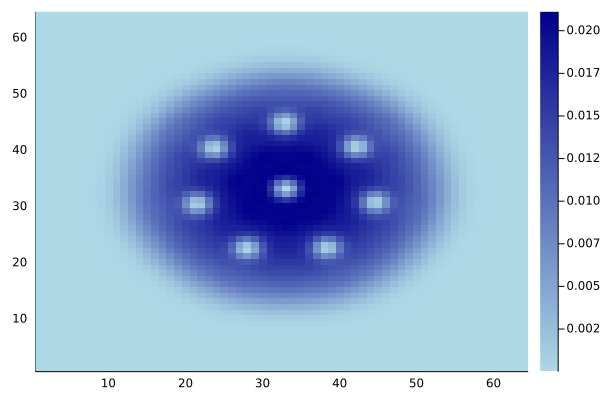

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)